In [2]:
%matplotlib inline

import os
#import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
POS_DIR = os.path.abspath(os.path.join(os.getcwd(), "..", "dataset", "positive"))
NEG_DIR = os.path.abspath(os.path.join(POS_DIR, "..", "negative"))
print("positive sample directory", POS_DIR)
print("negative sample directory", NEG_DIR)

if (not os.path.exists(NEG_DIR)):
    os.mkdir(NEG_DIR)

positive sample directory /home/niebq/DIP_project/dataset/positive
negative sample directory /home/niebq/DIP_project/dataset/negative


[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (1080, 1920, 3)
[debug] upscale image to (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)


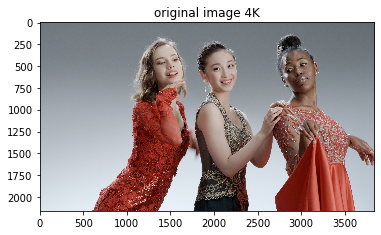

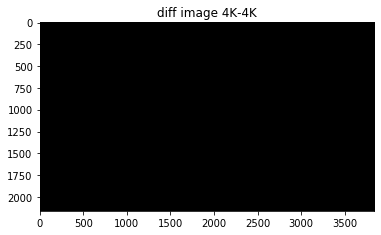

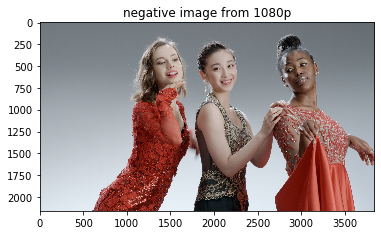

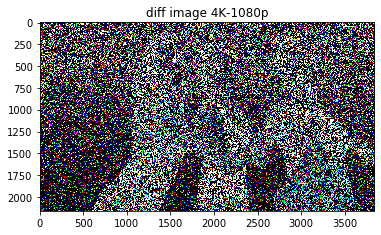

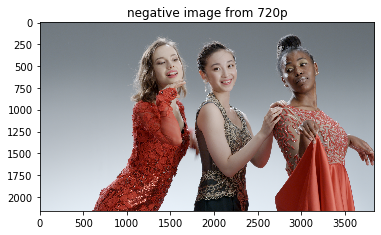

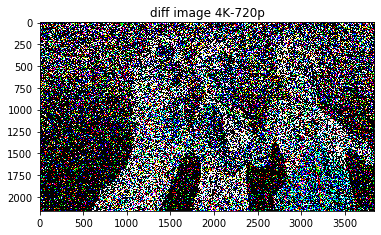

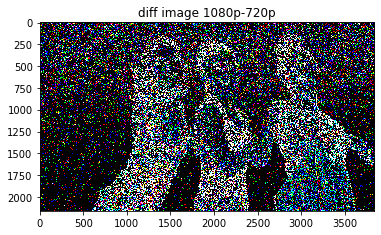

In [4]:
# In this code block I will try to convert one positive sample to the negative sample
# note that the actual size of the following resolutions
# 4K: 3840 * 2160
# 1080p: 1920 * 1080
# 720p: 1280 * 720

debug = True # a gloabl flag to control message display

def dlog(message):
    if debug:
        print("[debug] {}".format(message))

        
def open_image(path):
    '''
    encapsulate cv2.imread
    '''
    if (os.path.exists(path)):
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        dlog("image size when opened: {}".format(img.shape))
        return img
    else:
        print("[error] image to open (path: {}) does not exist".format(path))
    

def show_image(img, title="image"):
    '''
    encapsulate plt.imshow()
    '''
    color_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(color_img)
    plt.title(title)
    #plt.show()
    
def my_scale(img):
    '''
    scale a 3-channel image to [0, 255]
    '''
    #minn, maxx = np.min(img), np.max(img)
    #img = ((img - minn) * 255.0 / (maxx - minn)) if minn != maxx else img
    #print(img.shape)
    return img
    
    
def generate_negative(img, downscale_resolution="1080p", upscale_algorithm="lanczos"):
    '''
    take a real 4K image as input, and output a false 4K image
    '''
    res_4k = (3840, 2160)
    res_1080p = (1920, 1080)
    res_720p = (1280, 720)
    
    down_res = None
    if downscale_resolution == "1080p":
        down_res = res_1080p
    elif downscale_resolution == "720p":
        down_res = res_720p
    else:
        print("[error] invalid downscale resolution {}, valid ones are 1080p and 720p".format(downscale_resolution))
    
    small = cv2.resize(img, down_res, interpolation = cv2.INTER_AREA)
    dlog("downscale image to {}".format(small.shape))
    neg = cv2.resize(small, res_4k, interpolation = cv2.INTER_LANCZOS4)
    dlog("upscale image to {}".format(neg.shape))
    
    return neg

# test negative sample generation for one sample

fn = "101.bmp"
fpath = os.path.join(POS_DIR, fn)
img = open_image(fpath)
show_image(img, "original image 4K")
show_image(my_scale(img - img), "diff image 4K-4K")
neg = generate_negative(img, downscale_resolution="1080p")
show_image(neg, "negative image from 1080p")
show_image(my_scale(img - neg), "diff image 4K-1080p")
neg2 = generate_negative(img, downscale_resolution="720p")
show_image(neg2, "negative image from 720p")
show_image(my_scale(img - neg2), "diff image 4K-720p")
show_image(my_scale(neg - neg2), "diff image 1080p-720p")

cv2.imwrite(os.path.join(os.getcwd(), "4K.png"), img)
cv2.imwrite(os.path.join(os.getcwd(), "diff_720p.png"), img - neg2)

plt.show()

In [21]:
def run(downscale_resolution="720p", upscale_algorithm="lanczos"):
    debug = 0
    for root, dirs, filenames in os.walk(POS_DIR):
        for fn in filenames:
            print("[info] positive image file name: {}".format(fn))
            neg_fn = "{}.neg.{}.{}.bmp".format(fn.split('.')[0], downscale_resolution, upscale_algorithm)
            path = os.path.join(POS_DIR, fn)
            false_img = generate_negative(open_image(path), downscale_resolution, upscale_algorithm)
            cv2.imwrite(os.path.join(NEG_DIR, neg_fn), false_img)
    debug = 1

run()

[info] positive image file name: 90.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 158.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 155.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 12.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 20.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 22.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upsca

[info] positive image file name: 67.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 165.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 187.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 23.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 28.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 134.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upsc

[info] positive image file name: 18.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 55.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 136.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 177.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 181.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 141.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] ups

[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 148.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 139.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 132.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 173.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 107.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] po

[info] positive image file name: 87.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 163.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 83.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 99.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
[info] positive image file name: 178.bmp
[debug] image size when opened: (2160, 3840, 3)
[debug] downscale image to (720, 1280, 3)
[debug] upscale image to (2160, 3840, 3)
